---
# <font color='blue'> Case Study 1 </font>

## <font color='blue'>Group</font>
* Helene Barrera
* Sam Vonpaays Soh
* Justin Ehly
---

---
## <font color='blue'>Business Understanding</font>
The objective of this project is to produce a model using L1 or L2 regularization to predict new superconductors and the temperature at which they operate or actually become superconductors basd on their critical temperature at which they super conduct.

---

---
## <font color='blue'>Data Evaluation</font>
### <font color='blue'>1. What does the data look like</font>
 - There are 2 datasets that when combined row indicies, produce a larger dataset that is 21,263 rows by 168 explanatory variables and 1 response variable called 'critical_temp'



In [1]:
import os
import time
import copy
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
#os.chdir(r'C:\Users\justi\Google Drive\_SMU\7333 - Quantifying the World\Case Study 1')
os.chdir(r'D:\MS in Data Science\Quantifying\Case Study 1')

In [3]:
train = pd.read_csv('train.csv')
unique_m = pd.read_csv('unique_m.csv')

In [4]:
train.shape

(21263, 82)

In [5]:
unique_m.shape

(21263, 88)

In [6]:
train.drop(columns='critical_temp', inplace=True)
train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.044611,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.333333,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.833333,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.000000,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000


In [7]:
unique_m.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


From the descriptive charts for the train and unique_m datasets, we can give a quick glance over the data and check for anything out of place. 
  - We can see from the count column in both datasets that there are likely no missing values, since the count for all columns is the same. We were told this would be the case, but it's still good to check since that is very rare (and we will double check a little later too).
  - Although there are no missing values, there do appear to be values set to 0 in both sets. 
  - In the unique_m set, it can be assumed that elements with a value of 0 did not appear in that observation. According to the train set, the average number of elements used in combination during each observation was about 4. Hence the large amount of zeros present in that data set. 
  - In the train set, it's less apparent why the min for some of the columns is 0, although it's possible since we are dealing with atoms, that things like atomic mass were too small to be recorded and simply appear as 0. We would need further domain knowledge outside the scope of this project to dig in further so we will leave those values. 

In [8]:
# merge the dataframes
crit = train.merge(unique_m, left_index=True, right_index=True)


---
### <font color='blue'>2. Missing Data</font>
---

In [9]:
# capture the df description
missing_data = crit.describe()
crit.shape

(21263, 169)

In [10]:
# check for missing data

for i in missing_data.columns:
    if missing_data.loc['count',i] != crit.shape[0]:
        print(i)


In [11]:
crit.isna().any().any()

False

---
### Missing Data: 
We do not show any missing data, but that does not mean we don't have incorrect data.

---

### <font color='blue'>3. Variable Importance</font>
---

In [12]:
# check for correlation between the 2 original datasets
train.corrwith(unique_m).tolist()

# none

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [13]:
crit.columns.tolist()

['number_of_elements',
 'mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'wtd_mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'wtd_entropy_fie',
 'range_fie',
 'wtd_range_fie',
 'std_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'gmean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'wtd_range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'mean_Density',
 'wtd_mean_Density',
 'gmean_Density',
 'wtd_gmean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_range_Density',
 'std_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'entropy_E

---
#### group variable names to look for any similarites measurement type that have high correlation
---


In [14]:
# group columns based on the last word in their name to see if there is any correlation
mass = [col for col in crit.columns if 'mass' in col]
fie = [col for col in crit.columns if 'fie' in col]
radius = [col for col in crit.columns if 'radius' in col]
density = [col for col in crit.columns if 'Density' in col]
affinity = [col for col in crit.columns if 'ElectronAffinity' in col]
heat = [col for col in crit.columns if 'FusionHeat' in col]
conductivity = [col for col in crit.columns if 'ThermalConductivity' in col]
valence = [col for col in crit.columns if 'Valence' in col]

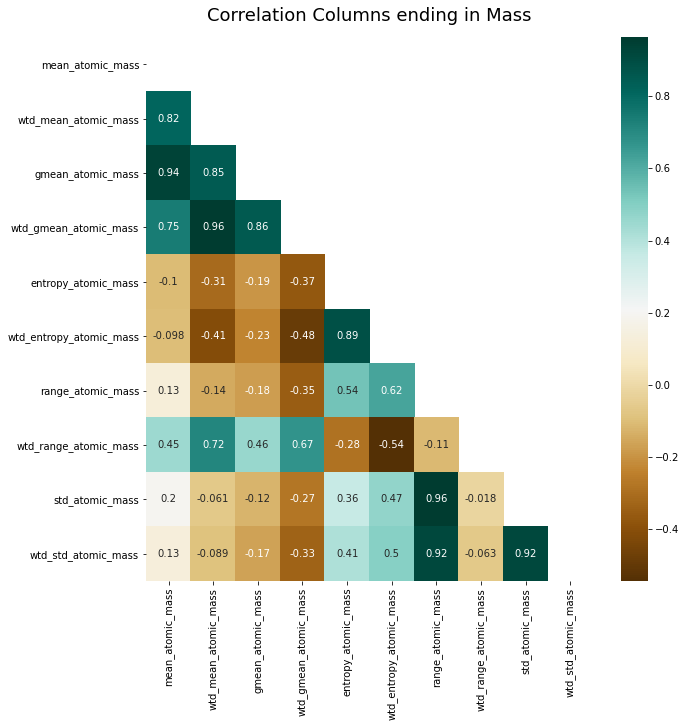

In [15]:

import seaborn as sns
corr = crit[mass].corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in Mass', fontdict={'fontsize':18}, pad=16);
plt.show()


##### Mass Correlation graph interpretation
Based on the mass variables, it looks like several columns can be safely dropped
* gmean_atomic_mass, wtd_gmean_atomic_mass, etd_entrooy_atomic_mass, std_atomic_mass and wtd_std_atomic_mass because they each have over a 90% correlation with another term, to be more safe we will look for the threshold to be greater than 0.95...

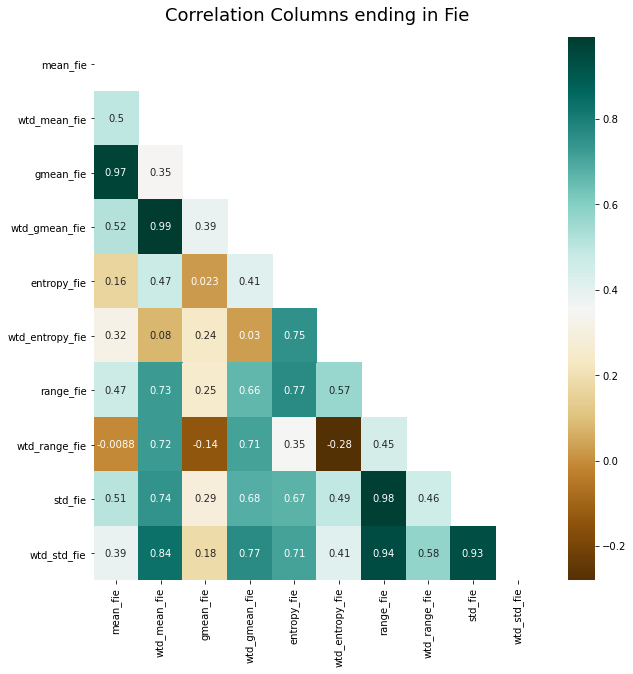

In [16]:

corr = crit[fie].corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in Fie', fontdict={'fontsize':18}, pad=16);
plt.show()

##### Fie Correlation graph interpretation
Based on the fie variables, it looks like several columns can be safely dropped if we use a .95 threshold as suggested above
* gmean_fie, wtd_gmean_fie, std_fie

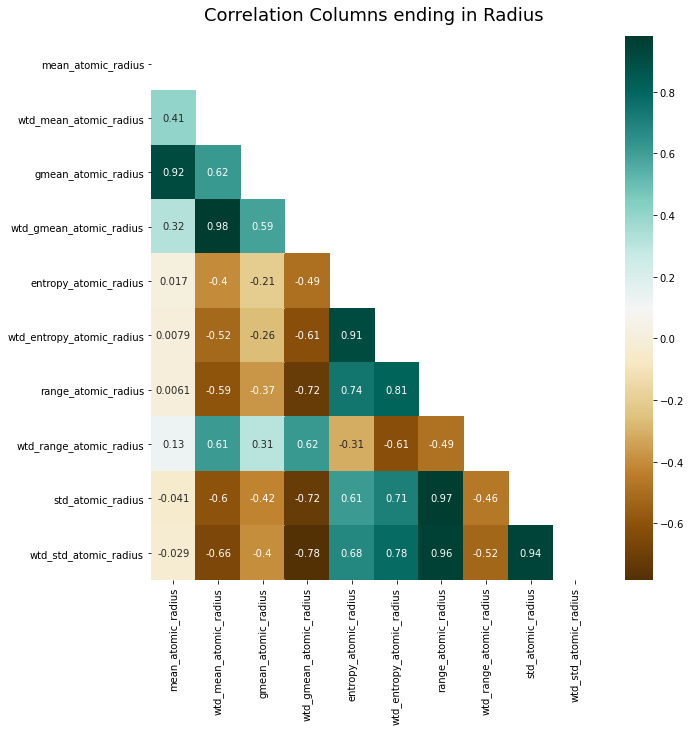

In [17]:

corr = crit[radius].corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in Radius', fontdict={'fontsize':18}, pad=16);
plt.show()


##### Radius Correlation graph interpretation
Based on the radius variables, it looks like several columns can be safely dropped if we use a .95 threshold as suggested above
* wtd_atomic_radius, std_atomic_radius, wtd_strd_atomic_radius

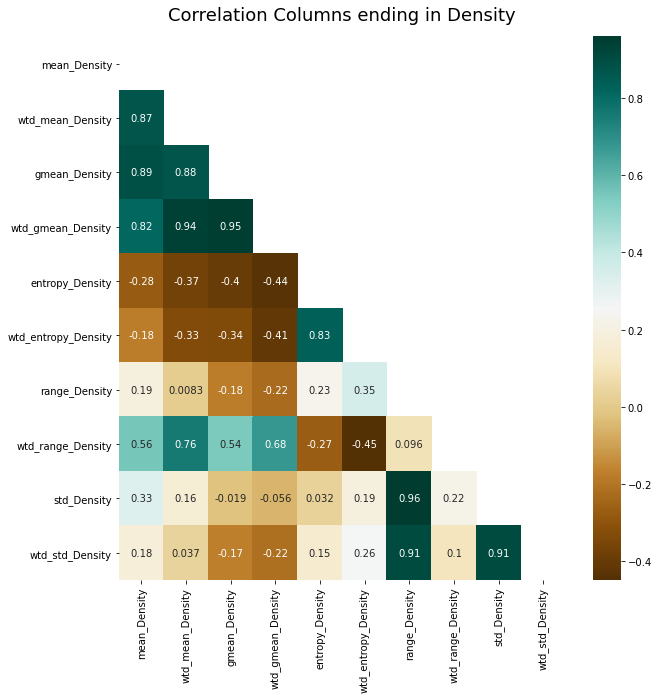

In [18]:
corr = crit[density].corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in Density', fontdict={'fontsize':18}, pad=16);
plt.show()


##### Density Correlation graph interpretation
Based on the density variables, it looks like 1 column can be safely dropped if we use a .95 threshold as suggested above
* std_density...may want to consider lowering to .94

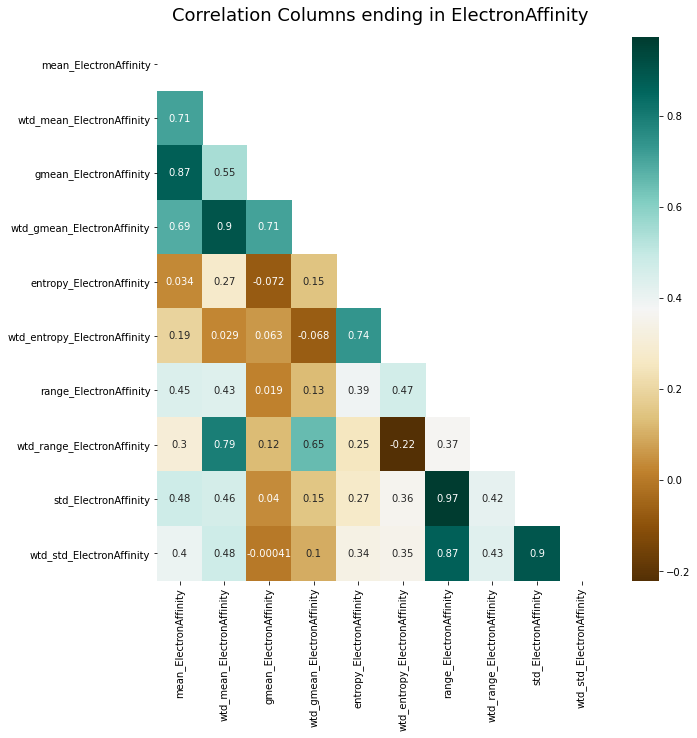

In [19]:
corr = crit[affinity].corr()
matrix= np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in ElectronAffinity', fontdict={'fontsize':18}, pad=16);
plt.show()


##### ElectronAffinity Correlation graph interpretation
Based on the ElectronAffinity variables, it looks like 1 column can be safely dropped if we use a .95 threshold as suggested above
* std_ElectronAffinity

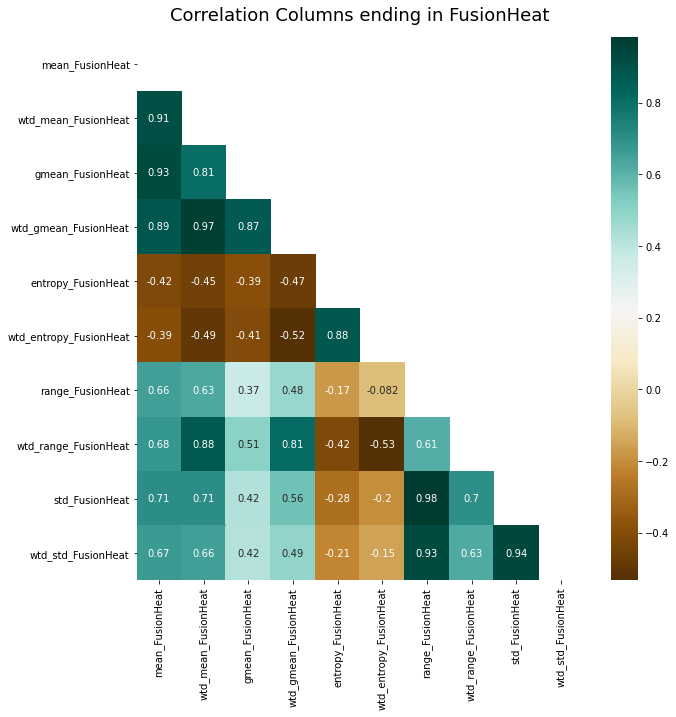

In [20]:
corr = crit[heat].corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in FusionHeat', fontdict={'fontsize':18}, pad=16);
plt.show()


##### FusionHeat Correlation graph interpretation
Based on the FusionHeat variables, it looks like 2 columns can be safely dropped if we use a .95 threshold as suggested above
* wtd_gmean_FusionHeat, std_FusionHeat

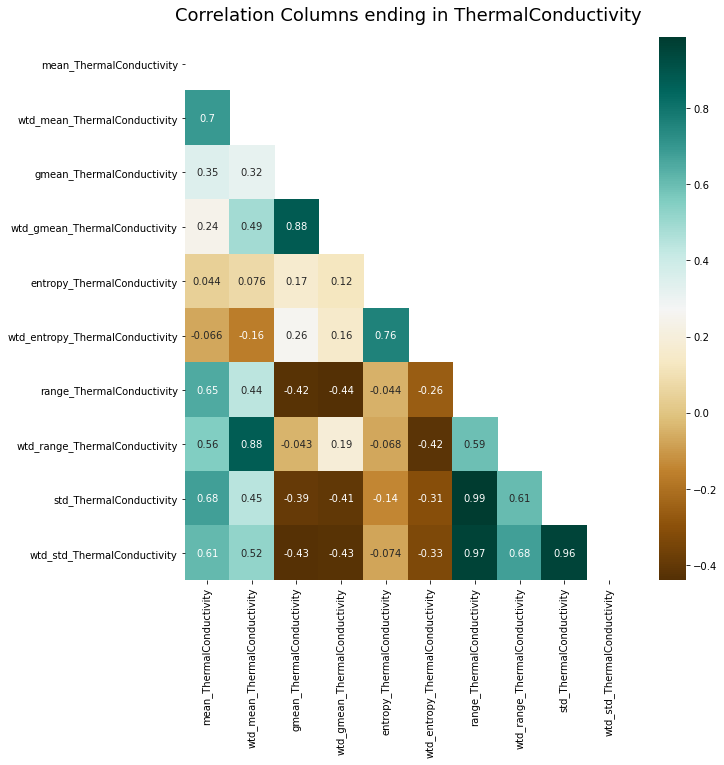

In [21]:
corr = crit[conductivity].corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in ThermalConductivity', fontdict={'fontsize':18}, pad=16);
plt.show()


##### ThermalConductivity Correlation graph interpretation
Based on the ThermalConductivity variables, it looks like 1 column can be safely dropped if we use a .95 threshold as suggested above
* wtd_std_ThermalConductivity

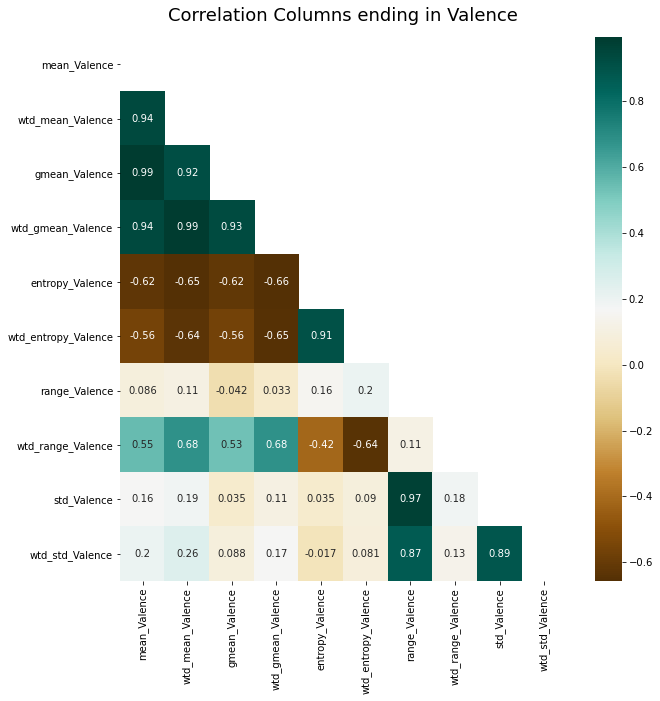

In [22]:
corr = crit[valence].corr()
matrix= np.triu(corr)

f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in Valence', fontdict={'fontsize':18}, pad=16);
plt.show()


##### Valence Correlation graph interpretation
Based on the Valence variables, it looks like a couple columns can be safely dropped if we use a .95 threshold as suggested above
* gmean_Valence, std_valence and possibly wtd_gmean_valence
---

##### Automating the process to remove highly correlated variables
---

In [23]:
# automating the process of removing highly correlated variables
corr_matrix = crit.corr().abs() #get the correlation matrix with absolute values

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # select just the upper triangle of the correlation matrix
print(upper_tri) # view the columns



                       number_of_elements  mean_atomic_mass  \
number_of_elements                    NaN          0.141923   
mean_atomic_mass                      NaN               NaN   
wtd_mean_atomic_mass                  NaN               NaN   
gmean_atomic_mass                     NaN               NaN   
wtd_gmean_atomic_mass                 NaN               NaN   
...                                   ...               ...   
Bi                                    NaN               NaN   
Po                                    NaN               NaN   
At                                    NaN               NaN   
Rn                                    NaN               NaN   
critical_temp                         NaN               NaN   

                       wtd_mean_atomic_mass  gmean_atomic_mass  \
number_of_elements                 0.353064           0.292969   
mean_atomic_mass                   0.815977           0.940298   
wtd_mean_atomic_mass                    NaN  

In [24]:
# get columns with over 0.95 correlation

#use list comprehension to get a list of ultra high correlated variables
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)] 

# print list of variables to drop from dataframe
print('\n',to_drop)
to_drop


 ['wtd_gmean_atomic_mass', 'std_atomic_mass', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'std_fie', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'wtd_gmean_Density', 'std_Density', 'std_ElectronAffinity', 'wtd_gmean_FusionHeat', 'std_FusionHeat', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'std_Valence']


['wtd_gmean_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'std_Density',
 'std_ElectronAffinity',
 'wtd_gmean_FusionHeat',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence']

In [25]:
#Checkpoint. Make a copy so that crit dataset won't be affected by future changes. 
casestudy = copy.deepcopy(crit)
casestudy

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


In [26]:
casestudy.drop(columns = to_drop, inplace=True)
casestudy.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'wtd_range_atomic_mass', 'wtd_std_atomic_mass',
       'mean_fie',
       ...
       'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'critical_temp',
       'material'],
      dtype='object', length=146)

### Variable Importance
The following columns had over 95% correlation, so they were removed from the dataframe:
1. 'wtd_gmean_atomic_mass',  
2. 'std_atomic_mass',  
3. 'gmean_fie',  
4. 'wtd_gmean_fie',
5. 'entropy_fie',
6. 'std_fie',
7. 'wtd_gmean_atomic_radius',
8. 'entropy_atomic_radius',
9. 'wtd_entropy_atomic_radius',
10. 'std_atomic_radius',
11. 'wtd_std_atomic_radius',
12. 'wtd_gmean_Density',
13. 'std_Density',
14.  'std_ElectronAffinity',
15.  'wtd_gmean_FusionHeat',
16.  'std_FusionHeat',
17. 'std_ThermalConductivity',
18. 'wtd_std_ThermalConductivity',
19. 'gmean_Valence',
20. 'wtd_gmean_Valence',
21. 'entropy_Valence',
22. 'wtd_entropy_Valence',
23.  'std_Valence'  
<br>

The revised dataframe now has 168 explanatory variables and 1 response variable 'critical_temp'


In [27]:
# get a sense of what is going on with the individual elements

elements = unique_m.iloc[:,:-2]
elements

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [28]:
len(elements.columns) # not all 118 elements in the periodic table are used

86

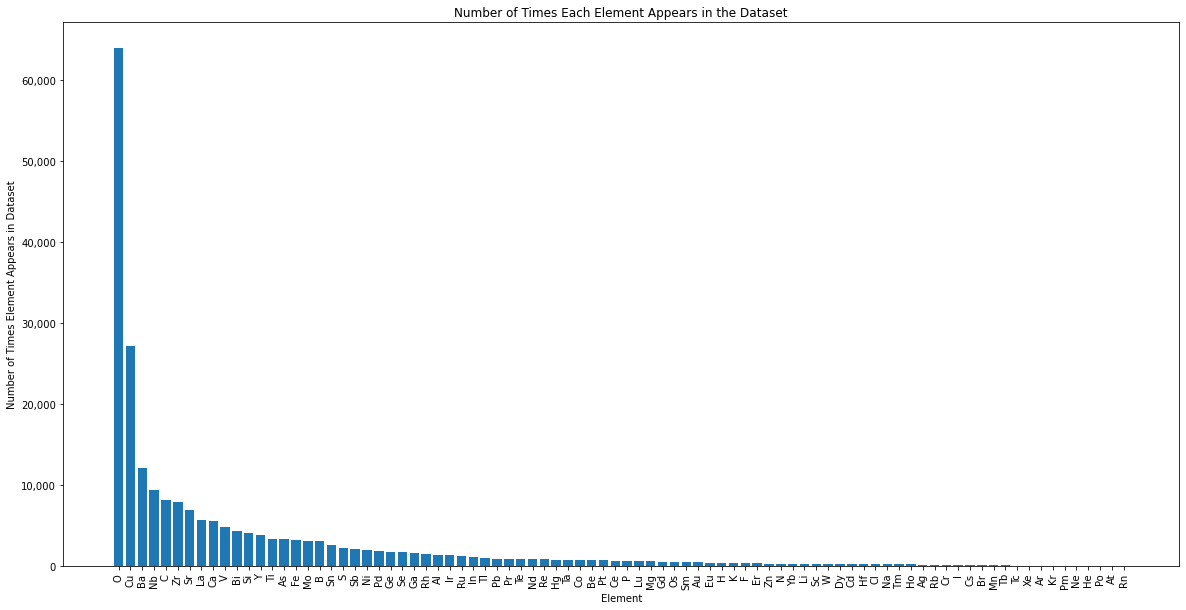

In [29]:
# CHART THE NUMBER OF TIMES EACH ELEMENT APPEARS IN THE DATASET
import matplotlib as mpl

ele = pd.DataFrame()
ele['element_tot'] = elements.sum(axis=0).astype('int')
ele.reset_index(inplace=True)
ele.rename(columns={'index':'element'}, inplace=True)
ele.sort_values('element_tot', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(20,10))
ax.bar(ele.element, ele.element_tot)
plt.xlabel('Element')
plt.ylabel('Number of Times Element Appears in Dataset')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Number of Times Each Element Appears in the Dataset')

plt.show()

In [30]:
ele.head(20)

,element,element_tot
7,O,63983
28,Cu,27147
55,Ba,12086
40,Nb,9405
5,C,8185
39,Zr,7886
37,Sr,6951
56,La,5633
19,Ca,5493
22,V,4779


#### Element Usage Interpretation
The most widely used elements in the dataset are: Oxygen (nonmetal), Copper (transitional metal), Barium (alkaline earth metal), Niobium (transitional metal), Carbon (nonmetal), Zirconium (transitional metal), Strontium (alkaline earth metal), Lanthanum (lanthide), Calcium (alkaline earth metal), Vanadium (transitional metal).<br><br>
While Xenon (noble gas), Argon (noble gas), Promethium (lanthide), Neon (noble gas), Helium (noble gas), Polonium (metalloid), Astatine (halogen) and Radon (noble gas) are not used at all and can probably be removed from the dataset because they will not have any predictable powers.

---
##### Inspect the response variable critical_temp


count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64 



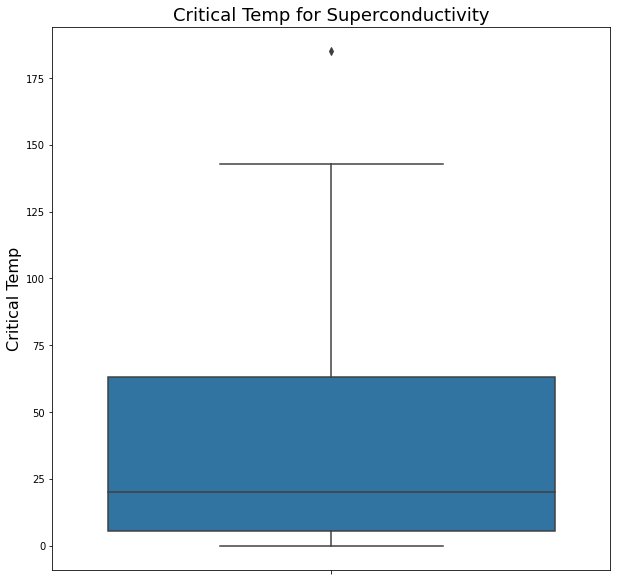

In [31]:
print(casestudy.critical_temp.describe(),'\n')

# boxplots

f, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(y= casestudy.critical_temp)
plt.title("Critical Temp for Superconductivity", fontsize=18)
plt.ylabel('Critical Temp', fontsize=16)

plt.show()

In [32]:
#Investigate the outlier
index = crit.critical_temp.argmax()
crit.iloc[crit.critical_temp.argmax(), [0,-2,-1]]

number_of_elements        2
critical_temp         185.0
material               H2S1
Name: 20573, dtype: object

##### Critical Temp Interpretation

Per the box plot above, there is one extreme outlier and a fairly large spread in the distribtion of the 75th percentile. Most superconductors tend to be below 65 degrees Kelvin. Upon further investigation, the superconductor with the highest known critical temperature is H2S1 at 185 K. Unfortunately without domain knowledge, we are unable to comment on whether this is suprising or unusual.

---

In [33]:
# first rearrange the columns to put the dependant variable first
cols = casestudy.columns.tolist()
cols = cols[-2:]+cols[:-2]
print(cols)
casestudy = copy.deepcopy(casestudy[cols])


['critical_temp', 'material', 'number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity', 'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat', 'wtd_range_Fusi

In [34]:
print(casestudy.columns)

Index(['critical_temp', 'material', 'number_of_elements', 'mean_atomic_mass',
       'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       ...
       'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn'],
      dtype='object', length=146)


##### materials feature
It appears the materials variable is just a summary of the elements + masses that we already have in numberical format, so we can drop that column

In [35]:

casestudy.drop(columns = 'material', inplace=True)
casestudy.head()

,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,29.0,4,88.944468,57.862692,66.361592,1.181795,1.062396,122.90607,31.794921,53.622535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,26.0,5,92.729214,58.518416,73.132787,1.449309,1.057755,122.90607,36.161939,53.979870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,19.0,4,88.944468,57.885242,66.361592,1.181795,0.975980,122.90607,35.741099,53.656268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,22.0,4,88.944468,57.873967,66.361592,1.181795,1.022291,122.90607,33.768010,53.639405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,23.0,4,88.944468,57.840143,66.361592,1.181795,1.129224,122.90607,27.848743,53.588771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [36]:
casestudy.info(verbose=True)

#here we can see all the data is int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 145 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    critical_temp                    float64
 1    number_of_elements               int64  
 2    mean_atomic_mass                 float64
 3    wtd_mean_atomic_mass             float64
 4    gmean_atomic_mass                float64
 5    entropy_atomic_mass              float64
 6    wtd_entropy_atomic_mass          float64
 7    range_atomic_mass                float64
 8    wtd_range_atomic_mass            float64
 9    wtd_std_atomic_mass              float64
 10   mean_fie                         float64
 11   wtd_mean_fie                     float64
 12   wtd_entropy_fie                  float64
 13   range_fie                        float64
 14   wtd_range_fie                    float64
 15   wtd_std_fie                      float64
 16   mean_atomic_radius               float

---
## <font color='blue'>Modeling Preparations</font>
- We are going to use L1/ Lasso for feature reduction. 
- We will also use an 80/20 shufflesplit from sklearn
- This method is important because as we are seeing with our EDA, some of the variables or features are very highly correlated and may not be important or as important as a variable they are correlated with. It is also important because as we see with the different elements, not all of them are used in the dataset and that may mean either we don't have enough data or those elements or they are just not used in developing superconductors.
- We will use MAE (mean actual error) to compare our training and testing sets and try to find a model that has the least amount of degredation between the two. 
- As a backup we will also use RMSE because it is a good indication of the degredation from a model's fit to its predictive capabilites with new data. Again, the main goal is to use the the model that provides the lowest difference between the training and test RMSE.
---

---
## <font color='blue'>LASSO/ L1 Regularization Model Building & Evaluation</font>
---
### <font color='blue'>Model Building</font>
- Sklearn's LASSO includes regularization controlled by the alpha
- Sklearn's LASSO normalizes when set to True X_norm = (X-mean(X))/l2-norm, so there's no reason to scale using StandardScaler
- MAE will be the primary metric for comparison between train and test data
- RMSE will be back up metric for comparison between train and test data
---

##### Sampling Methodology

We chose to use an 80/20 shuffle split with gridsearch and a lasso regression. 
  - Parameters for Gridsearch included 5 alpha values, warm start T and F, both cyclic and random selection, and 2 tolerance levels. 
  - The the lasso parameters normalized the data, included precomputing, and set max number of iterations to 10000. 

In [37]:
# Split the data 80/20
from sklearn.model_selection import train_test_split, GridSearchCV

y = casestudy.critical_temp
X = casestudy.loc[:, casestudy.columns != 'critical_temp']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(15947, 144) (15947,)
(5316, 144) (5316,)


In [38]:
#L1 Normalization: GridSearchCV w/ Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer 

# make scorers
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)

#make scorer array to pass into cross_validate() function for producing multiple scores for each cv fold
errorScoring = {'MAE':  mae_scorer,
                'RMSE': rmse_scorer}


# set base LASSO parameters
reg_lasso = Lasso(fit_intercept=True, normalize=True, copy_X=True, max_iter=10000, precompute=True, random_state=42)


scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error']

#test parameters
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
fit_intercept = [True] #Default value.  If set to False, the data is expected to be centered.
tol = [0.0001, 0.001]
parameters_lasso = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start, 'tol':tol, 'fit_intercept':fit_intercept}

#create a grid search object using the parameters above
regGridSearch_lasso = GridSearchCV(estimator=reg_lasso,
                                   n_jobs=16, #run jobs in parallet
                                   refit= 'MAE',   #score to refit on
                                   verbose=1, #low verbosity
                                   param_grid=parameters_lasso,
                                   cv=10, #KFolds = 10
                                   scoring=errorScoring)

In [39]:
#perform hyperparameter search to find the best combination of parameters for our data
grid_fit = regGridSearch_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [40]:
#display the best estimator parameters
regGridSearch_lasso.best_estimator_

Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True,
      random_state=42, selection='random', tol=0.001, warm_start=True)

In [41]:
#results of GridSearch
regGridSearch_lasso.cv_results_

{'mean_fit_time': array([0.30216863, 0.32427468, 0.32497244, 0.39498849, 0.38418581,
        0.48941164, 0.42109408, 0.47060802, 0.51231647, 0.33597195,
        0.50751159, 0.4246944 , 0.50231218, 0.40558856, 0.5378232 ,
        0.48410816, 0.43519821, 0.4839062 , 0.40078852, 0.55762429,
        0.41219316, 0.4875124 , 0.41759017, 0.43069763, 0.54582076,
        0.35918338, 0.48931191, 0.50431559, 0.41059506, 0.52491686,
        0.44379992, 0.41449316, 0.52381577, 0.4249979 , 0.44509814,
        0.44449992, 0.4980139 , 0.4333987 , 0.40409234, 0.34357617]),
 'std_fit_time': array([0.05679978, 0.05204277, 0.05604833, 0.10634984, 0.12901337,
        0.17144052, 0.12410414, 0.188635  , 0.17131917, 0.03113569,
        0.13783439, 0.16068319, 0.14584893, 0.11162089, 0.17394659,
        0.19944088, 0.19291544, 0.15425932, 0.17793306, 0.1630494 ,
        0.15097322, 0.20047278, 0.14295026, 0.16457847, 0.17087808,
        0.08016186, 0.20589649, 0.1632846 , 0.15021509, 0.16567284,
        0.160

In [42]:
#results of GridSearch df
tune_df_lasso = pd.concat([pd.DataFrame(regGridSearch_lasso.cv_results_["rank_test_MAE"], columns=["Rank"]), 
                           pd.DataFrame(regGridSearch_lasso.cv_results_["params"]),
                           pd.DataFrame((regGridSearch_lasso.cv_results_["mean_test_MAE"]*-1), columns=["Mean Test MAE"]),
                           pd.DataFrame((regGridSearch_lasso.cv_results_["mean_test_RMSE"]*-1), columns=["Mean Test RMSE"])
                          ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_lasso.head(5)

,Rank,alpha,fit_intercept,selection,tol,warm_start,Mean Test MAE,Mean Test RMSE
0,1,0.001,True,random,0.0010,True,13.246155,22.621874
1,1,0.001,True,random,0.0010,False,13.246155,22.621874
2,3,0.001,True,cyclic,0.0010,True,13.248561,22.624821
3,3,0.001,True,cyclic,0.0010,False,13.248561,22.624821
4,5,0.001,True,random,0.0001,True,13.248835,22.634198


In [43]:
#create a regression estimator with best parameters for cross validation
regEstimator_lasso = regGridSearch_lasso.best_estimator_

In [44]:
#function to evaluate regression models using the cross validation object & custom scorers above
from sklearn.model_selection import cross_validate, ShuffleSplit

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv_reg, return_train_score=True)
    
    #cross val score sign-flips the outputs of MAE
    
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1
    
    #print mean MAE for all folds
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg: .5}"
    print(print_str.format(maeAvg=maeAvg))
    

    #print mean RMSE for all folds
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is:  \t\t\t {RMSEavg: .5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('***************************************************************')
    
    print("Cross Validation Fold Mean Error Scores")
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

---
### <font color='blue'>Model Evaluation</font>
---
#### Cook's Distance Outlier Detection

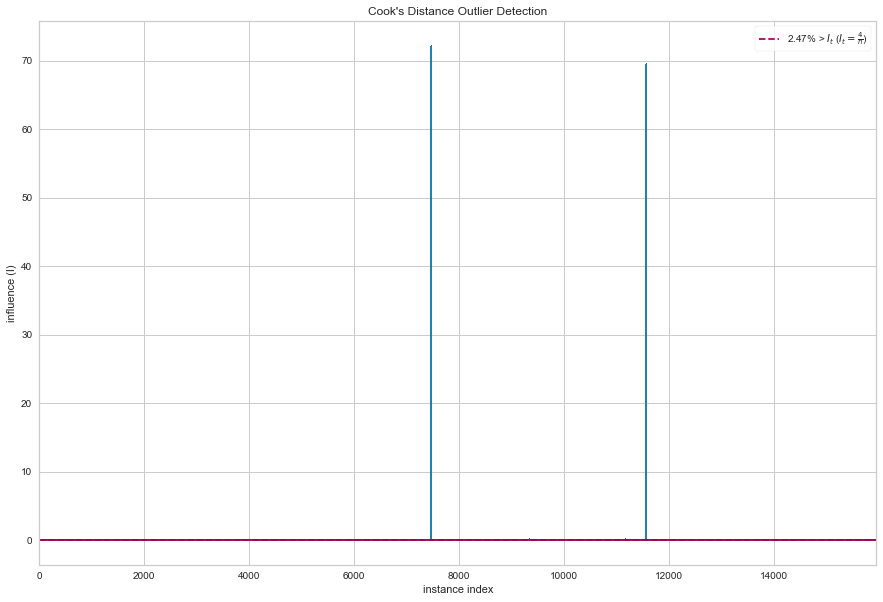

In [45]:
from yellowbrick.regressor import residuals_plot, PredictionError, CooksDistance
from yellowbrick.features import RadViz

#create an outlier plot
visualizer = RadViz(size=(1080,720))

#instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

##### Cook's D Graph Interpretation 

While the Cook’s D is very large for two points, those points seem to fall in line with what we could expect the linear relationship of the variables to look like (see QQ plot below). We don’t think these two high cook’s d points will change the outcome of the model.
 
---

In [46]:
%%time

cv_reg = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)


#evaluate the regression estimator using our pre-defined cross validation and scoring metrics
EvaluateRegressionEstimator(regEstimator_lasso, X_train, y_train, cv_reg)

The average MAE for all cv folds is: 			  13.096
The average RMSE for all cv folds is:  			  21.077
***************************************************************
Cross Validation Fold Mean Error Scores
Wall time: 514 ms


,MAE,RMSE
0,13.004639,17.463922
1,14.060612,40.602717
2,12.876330,17.362725
3,13.044990,17.677641
4,12.903176,17.324884
5,13.351982,31.038306
6,13.110090,17.429569
7,12.849491,17.270407
8,12.691111,16.959738
9,13.064066,17.639880


From the grid search fine tuning, our best parms gives us a MAE of 13.00 which perform better than the average of 13.10 as shown above. The RMSE is also better 17.46 when compare to the average of 21.08.

---
#### Residual Plot
---

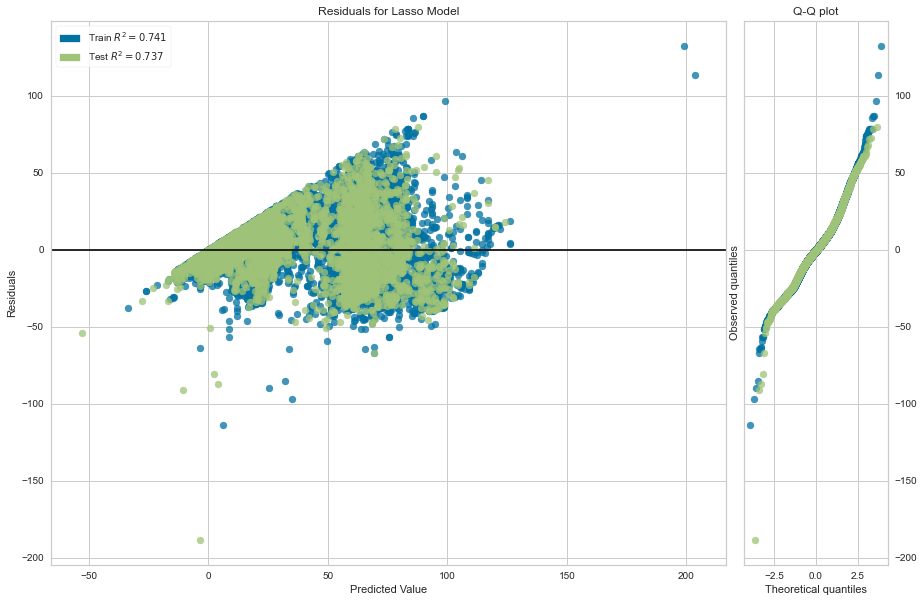

In [47]:
#create residual plot
visualizer = RadViz(size=(1080, 720))

# Create the visualizer, fit, score, and show it
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(regEstimator_lasso, X_train, y_train, X_test, y_test, qqplot=True, hist=False)

##### Residual Plot Interpretation
While there are a couple outliers, and the points are a little less evenly distributed than could normally be expected, overall for being limited to a linear model, this is a good fit. In a more extensive project, we might investigate the different clusters of values and some of the outliers.


---
#### Prediction Error Plot

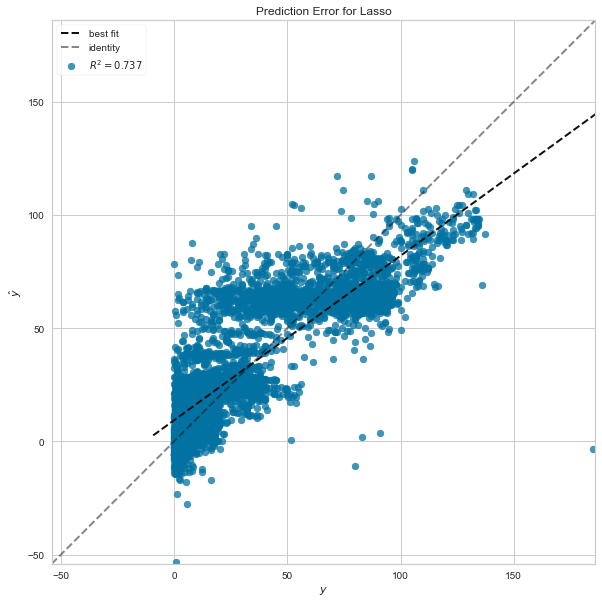

In [48]:
#create error plot
visualizer = RadViz(size=(1080,720))
visualizer = PredictionError(regEstimator_lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
plt.show()

##### Error Plot Interpretation

Our predicted values are not too far off from what our test model shows. Again, there are a few outliers, but overall our model fits pretty well. 

---

### <font color='blue'>Model Interpretability & Explainability</font>


#### Top Features


In [49]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
df = copy.deepcopy(casestudy.loc[:, casestudy.columns != 'critical_temp'])
weights = regEstimator_lasso.coef_.ravel()
feature_names = df.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )


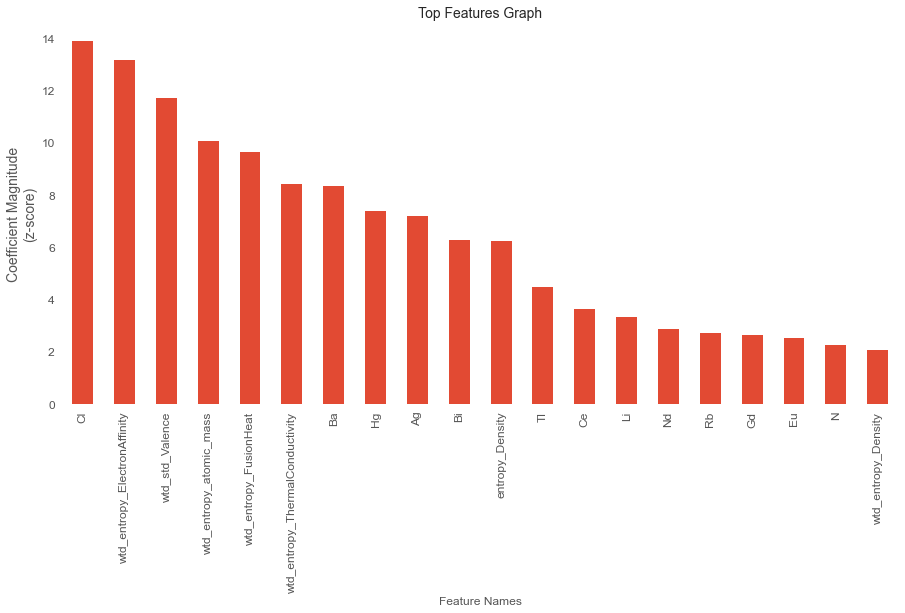

------------------------

feature_names
Cl                                 13.858582
wtd_entropy_ElectronAffinity       13.154062
wtd_std_Valence                    11.675985
wtd_entropy_atomic_mass            10.030906
wtd_entropy_FusionHeat              9.622913
wtd_entropy_ThermalConductivity     8.403195
Ba                                  8.344362
Hg                                  7.376554
Ag                                  7.183238
Bi                                  6.272499
entropy_Density                     6.229796
Tl                                  4.470922
Ce                                  3.611593
Li                                  3.307983
Nd                                  2.873013
Rb                                  2.697330
Gd                                  2.643984
Eu                                  2.516845
N                                   2.244913
wtd_entropy_Density                 2.065689
dtype: float64


In [50]:
# Examine categorical variables of interest by absolute value
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
wt_plt_df = linreg_ft_imp_df.head(20)

weights = pd.Series(wt_plt_df['absolute_weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar')

ax.set_title("Top Features Graph", fontsize=14)
ax.set_ylabel("Coefficient Magnitude\n(z-score)", fontsize=14)
ax.set_xlabel("Feature Names", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=12)
ax.set_facecolor('white')
plt.show()
print('------------------------\n')
print(weights)

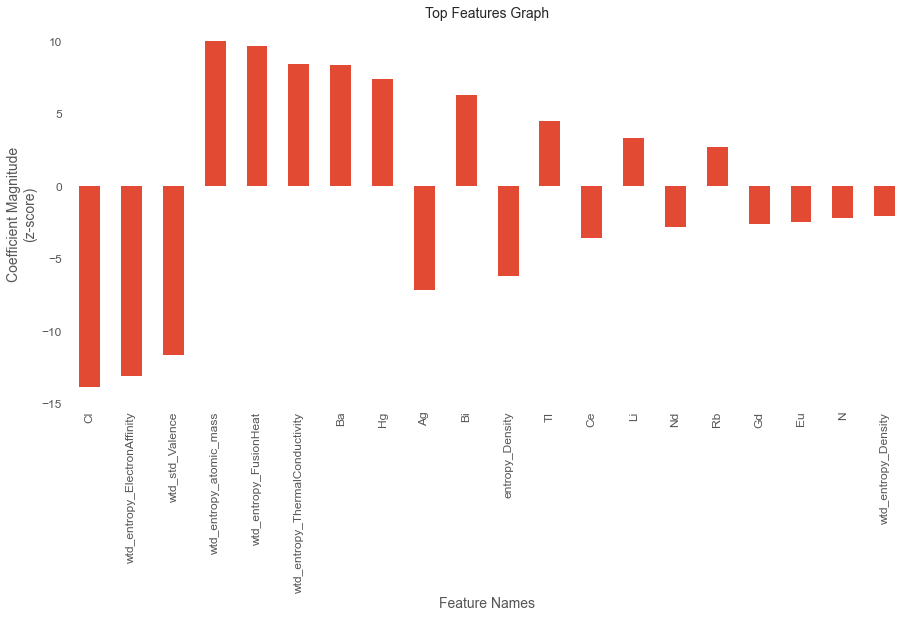

------------------------

feature_names
Cl                                -13.858582
wtd_entropy_ElectronAffinity      -13.154062
wtd_std_Valence                   -11.675985
wtd_entropy_atomic_mass            10.030906
wtd_entropy_FusionHeat              9.622913
wtd_entropy_ThermalConductivity     8.403195
Ba                                  8.344362
Hg                                  7.376554
Ag                                 -7.183238
Bi                                  6.272499
entropy_Density                    -6.229796
Tl                                  4.470922
Ce                                 -3.611593
Li                                  3.307983
Nd                                 -2.873013
Rb                                  2.697330
Gd                                 -2.643984
Eu                                 -2.516845
N                                  -2.244913
wtd_entropy_Density                -2.065689
dtype: float64


In [51]:
# Examine categorical variables of interest with pos/neg correlation in mind 
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
wt_plt_df = linreg_ft_imp_df.head(20)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar')

ax.set_title("Top Features Graph", fontsize=14)
ax.set_ylabel("Coefficient Magnitude\n(z-score)", fontsize=14)
ax.set_xlabel("Feature Names", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=12)
ax.set_facecolor('white')
plt.show()
print('------------------------\n')
print(weights)

#### Top Features Interpretation
The most important feature was the element Chlorine, followed by wtd_entropy_ElectronAffinity and wtd_std_Valence, all of which were negatively correlated with Critical Temperature. This means that out of all our variables, those three have the highest importance when it comes to critical temperature, and all three of them drive down that temperature. The next three most important varibles were all positively correlated, meaning as they go up, the critical temperature also goes up. Those next three variables were wtd_entropy_atomic_mass, wtd_entropy_FusionHeat, and wtd_entropy_ThermalConductivity. 

We can also see that while Chlorine is the element with the biggest impact in driving the temperature down, Barium had the most impact when it came to driving the temperature up. 


---


---
### <font color='blue'>Case Conclusions</font>

<b>What are we proposing to our audience and why? </b><br>
  Our model should be used to understand what factors increase and decrease the temperature at which materials superconduct. Since we have very little knowledge of the subject matter, it would be unwise to directly recommend a course of action. However, if a subject matter expert were, for example, ask us which elements raise the critical temperature by the most degrees, we woud have a ready answer. 

<b>How should they review our results and what should they consider moving forward?</b><br>

  The biggest takeaways from this project are in the top features graph interpretation section. There you can see which elements have the highest impact (both positive and negative) on critical temperature. It also describes the most important other features to consider when searching for new materials with which to create superconductors. Lastly, it may have been missed, but H2S1 was our highest critical temperature superconductor, although neither element in that material appear on the list of important features. 
  
  
<b>Are there other approaches we recommend?</b><br>
  We do recommend using a more complex model, as it became apparent that the relationship between the variables may not have been linear, or at the very least it may have been 3 separate clusters with 3 different relationships that describe them. 
  
---


